## Domain Adaptation Workflow
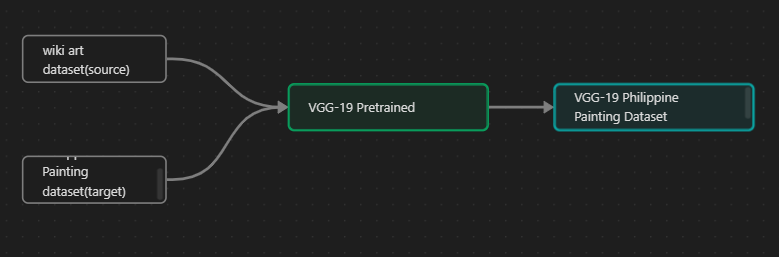

#Feature Extractors

Edge Extractor = Canny Edge Detector

In [ ]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow


def process_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    edges = cv2.Canny(blurred, 100, 200)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 1)
    return len(contours)



folder_path = '/content/drive/MyDrive/Target_dataset ORIG/Dataset-main/Class4'

total_edges = 0
num_images = 0


for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
        num_images += 1
        image_path = os.path.join(folder_path, filename)
        num_edges = process_image(image_path)
        total_edges += num_edges


average_edges = total_edges / num_images if num_images > 0 else 0
print(f"Average number of distinct edges per image: {average_edges}")

Average number of distinct edges per image: 847.3589743589744


In [ ]:
import cv2
import numpy as np
import os
from skimage.feature import greycomatrix, greycoprops
from skimage import io, color


def calculate_glcm_features(image_path):

    image = io.imread(image_path)
    if image.shape[-1] == 4:
        image = image[..., :3]
    gray_image = color.rgb2gray(image)
    gray_image = (gray_image * 255).astype('uint8')


    glcm = greycomatrix(gray_image, distances=[1], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256, symmetric=True, normed=True)


    features = {}
    properties = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']
    for prop in properties:
        features[prop] = np.mean([greycoprops(glcm, prop)[0, angle] for angle in range(4)])
    return features


folder_path = '/content/drive/MyDrive/Target_dataset ORIG/Dataset-main/Class4'

texture_features = {prop: [] for prop in ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']}


for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
        image_path = os.path.join(folder_path, filename)
        features = calculate_glcm_features(image_path)
        for prop in texture_features:
            texture_features[prop].append(features[prop])


representative_values = {prop: np.mean(values) for prop, values in texture_features.items()}

print("Representative Texture Feature Values for the Image Set:")
for feature, value in representative_values.items():
    print(f"{feature}: {value}")


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Representative Texture Feature Values for the Image Set:
contrast: 473.52667474755856
dissimilarity: 11.792232059901941
homogeneity: 0.17934862883137373
energy: 0.01847230146840216
correlation: 0.9088557811072338
ASM: 0.00040730499762827495


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

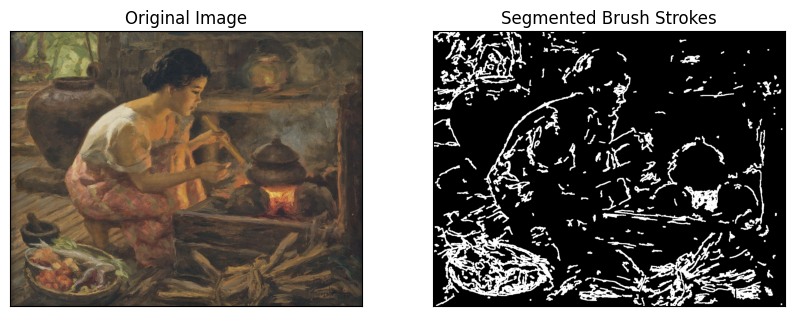

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def segment_brush_strokes(image_path):
    # Read and preprocess the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)

    # Edge detection
    edges = cv2.Canny(blurred, 50, 150)

    # Dilate the edges to make the brush strokes more connected
    kernel = np.ones((5,5), np.uint8)
    dilated_edges = cv2.dilate(edges, kernel, iterations=1)

    # Connected components to segment the brush strokes
    num_labels, labels_im = cv2.connectedComponents(dilated_edges)

    # Create a binary image where each brush stroke is marked as white (255) on a black (0) background
    # All non-zero labels (which correspond to brush strokes) are marked white
    segmented_brushstrokes = np.where(labels_im > 0, 255, 0).astype('uint8')

    # Display the result
    plt.figure(figsize=(10, 6))
    plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(segmented_brushstrokes, cmap='gray')
    plt.title('Segmented Brush Strokes'), plt.xticks([]), plt.yticks([])
    plt.show()

    return segmented_brushstrokes

# Replace with your image path
image_path = '/content/drive/MyDrive/Target_dataset/Dataset-main/class_Impressionism/woman_cooking_in_the_kitchen-fernando_cueto_amorsolo.jpg'
binary_brushstrokes = segment_brush_strokes(image_path)



###Brushstroke Analysis

In [ ]:
import cv2
import numpy as np
from skimage.morphology import skeletonize
from scipy.spatial.distance import euclidean
from skimage.measure import regionprops, label
from skimage import img_as_ubyte

# Assuming 'segmented_brushstrokes' is a binary image resulting from your segmentation
extracted_brushstrokes = binary_brushstrokes//255
skeleton = skeletonize(extracted_brushstrokes)

# Label different components (strokes)
label_img = label(skeleton)
regions = regionprops(label_img)

# Initialize lists to store measurements
lengths = []
thicknesses = []
angles = []

# Analyze each region for features
for region in regions:
    # Measure the length as the sum of distances between consecutive pixels in the skeleton
    # This assumes that 'coords' are in (row, col) order
    coords = region.coords
    for i in range(len(coords) - 1):
        lengths.append(euclidean(coords[i], coords[i+1]))

    # Thickness can be measured using the 'equivalent diameter' from regionprops
    thicknesses.append(region.equivalent_diameter)

    # Angle can be measured using the orientation from regionprops
    angles.append(region.orientation)

# Calculate average length, thickness, and angle
average_length = np.mean(lengths)
average_thickness = np.mean(thicknesses)
average_angle = np.mean(angles)  # This will give you an average angle in radians

print(f"Average Length: {average_length}")
print(f"Average Thickness: {average_thickness}")
print(f"Average Angle: {average_angle} radians, {np.degrees(average_angle)} degrees")


Average Length: 15.769312989983293
Average Thickness: 9.116587303647401
Average Angle: -0.10676307439271052 radians, -6.117073570543547 degrees


##FOR GROUP

In [ ]:
import os
import cv2
import numpy as np
from skimage.morphology import skeletonize
from skimage.measure import regionprops, label
from scipy.spatial.distance import euclidean
from skimage import img_as_ubyte

def segment_brush_strokes(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)
    edges = cv2.Canny(blurred, 50, 150)
    kernel = np.ones((5,5), np.uint8)
    dilated_edges = cv2.dilate(edges, kernel, iterations=1)
    num_labels, labels_im = cv2.connectedComponents(dilated_edges)
    segmented_brushstrokes = np.where(labels_im > 0, 255, 0).astype('uint8')
    return segmented_brushstrokes

def calculate_brushstroke_features(segmented_brushstrokes):
    skeleton = skeletonize(segmented_brushstrokes // 255)
    label_img = label(skeleton)
    regions = regionprops(label_img)
    lengths = []
    thicknesses = []
    angles = []
    for region in regions:
        coords = region.coords
        for i in range(len(coords) - 1):
            lengths.append(euclidean(coords[i], coords[i+1]))
        thicknesses.append(region.equivalent_diameter)
        angles.append(region.orientation)
    return lengths, thicknesses, angles

folder_path = '/content/drive/MyDrive/Target_dataset ORIG/Dataset-main/Class4'

cumulative_lengths = []
cumulative_thicknesses = []
cumulative_angles = []

for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        if image is None:
            print(f"Failed to load image {filename}")
            continue
        segmented_brushstrokes = segment_brush_strokes(image)
        lengths, thicknesses, angles = calculate_brushstroke_features(segmented_brushstrokes)
        cumulative_lengths.extend(lengths)
        cumulative_thicknesses.extend(thicknesses)
        cumulative_angles.extend(angles)

if cumulative_lengths:
    average_length = np.mean(cumulative_lengths)
else:
    average_length = float('nan')

if cumulative_thicknesses:
    average_thickness = np.mean(cumulative_thicknesses)
else:
    average_thickness = float('nan')

if cumulative_angles:
    average_angle = np.mean(cumulative_angles)  # This will give you an average angle in radians
else:
    average_angle = float('nan')

print(f"Average Length across all images: {average_length} pixels")
print(f"Average Thickness across all images: {average_thickness} pixels")
print(f"Average Angle across all images: {average_angle} radians, {np.degrees(average_angle)} degrees")


Average Length across all images: 28.94446834119307 pixels
Average Thickness across all images: 11.02036871656579 pixels
Average Angle across all images: -0.10520573848177579 radians, -6.027844795562826 degrees


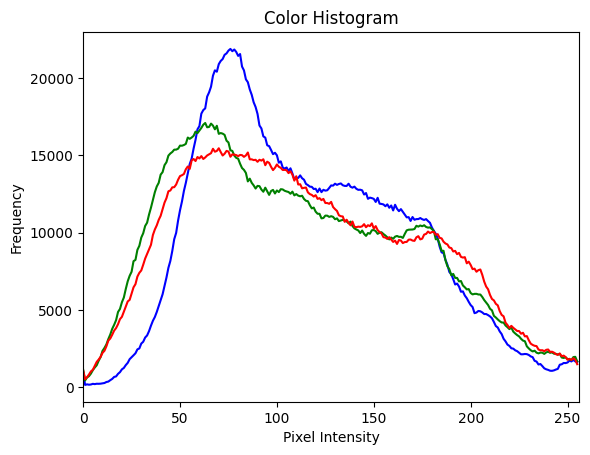

In [ ]:
import cv2
from matplotlib import pyplot as plt

# Function to plot color histogram
def plot_color_histogram(image_path):
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Could not read image.")
        return

    # Calculate the histogram for each color channel
    color = ('b', 'g', 'r')
    for i, col in enumerate(color):
        histogram = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(histogram, color = col)
        plt.xlim([0, 256])

    plt.title('Color Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()

# Replace with the path to your image
image_path = '/content/drive/MyDrive/wikiart2_dataset/Cubism/albert-gleizes_football-players-1912.jpg'
plot_color_histogram(image_path)

###Luminance Feature

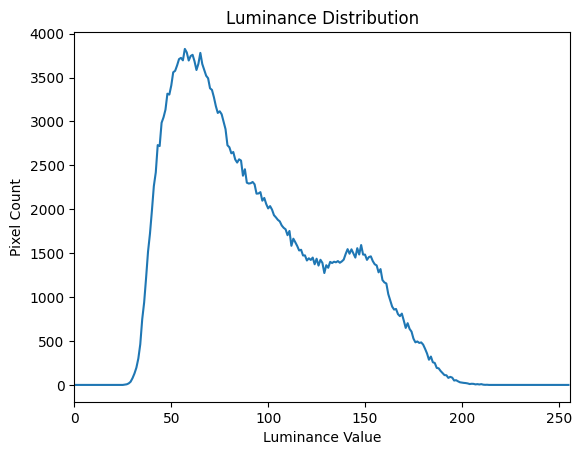

In [ ]:
import cv2
from matplotlib import pyplot as plt

def plot_luminance_distribution(image_path):
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Could not read image.")
        return

    # Convert the image from BGR to Y'CbCr color space
    ycbcr_image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

    # Extract the Y' channel
    Y_channel = ycbcr_image[:, :, 0]

    # Calculate the histogram of the Y' channel
    histogram = cv2.calcHist([Y_channel], [0], None, [256], [0, 256])

    # Plot the histogram
    plt.figure()
    plt.title('Luminance Distribution')
    plt.xlabel('Luminance Value')
    plt.ylabel('Pixel Count')
    plt.xlim([0, 256])
    plt.plot(histogram)
    plt.show()

# Replace with the path to your image
image_path = '/content/drive/MyDrive/Target_dataset/Dataset-main/class_Impressionism/harana-carlos_botong_francisco.jpg'
plot_luminance_distribution(image_path)


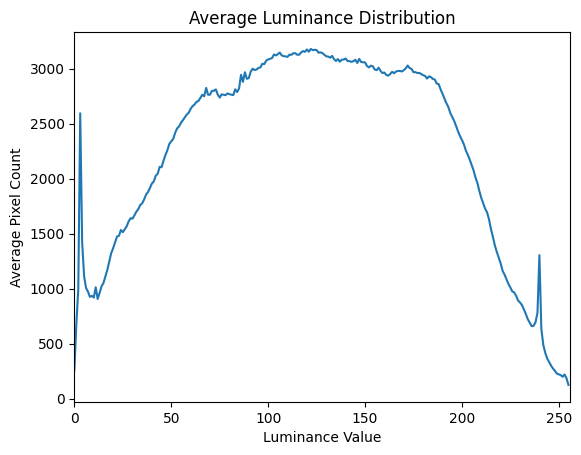

In [ ]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

def calculate_luminance_histogram(image_path):
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not read image at {image_path}.")
        return None

    # Convert the image from BGR to Y'CbCr color space
    ycbcr_image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

    # Extract the Y' channel
    Y_channel = ycbcr_image[:, :, 0]

    # Calculate the histogram of the Y' channel
    histogram = cv2.calcHist([Y_channel], [0], None, [256], [0, 256])
    return histogram

def plot_average_luminance_distribution(folder_path):
    # Initialize a variable to store the cumulative histogram
    cumulative_histogram = np.zeros((256,1))

    # Count the number of images processed
    image_count = 0

    # Iterate through each file in the folder
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
            image_path = os.path.join(folder_path, filename)
            histogram = calculate_luminance_histogram(image_path)
            if histogram is not None:
                cumulative_histogram += histogram
                image_count += 1

    # Calculate the average histogram
    if image_count > 0:
        average_histogram = cumulative_histogram / image_count
    else:
        print("No valid images were found.")
        return

    # Plot the average histogram
    plt.figure()
    plt.title('Average Luminance Distribution')
    plt.xlabel('Luminance Value')
    plt.ylabel('Average Pixel Count')
    plt.xlim([0, 256])
    plt.plot(average_histogram)
    plt.show()

# Replace with the path to your folder
folder_path = '/content/drive/MyDrive/Target_dataset/Dataset-main/CLASS 4 (Cubism)'
plot_average_luminance_distribution(folder_path)


#RGB Median

In [ ]:
import os
import torch
from PIL import Image
from torchvision import transforms
from tqdm import tqdm

data_dir = '/content/drive/MyDrive/target Datasets/Class4'

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# List to store all pixel values
pixels = {'red': [], 'green': [], 'blue': []}

for filename in tqdm(os.listdir(data_dir)):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(data_dir, filename)
        image = Image.open(image_path).convert('RGB')
        tensor_image = transform(image)

        red_channel = tensor_image[0].flatten().tolist()
        green_channel = tensor_image[1].flatten().tolist()
        blue_channel = tensor_image[2].flatten().tolist()

        pixels['red'].extend(red_channel)
        pixels['green'].extend(green_channel)
        pixels['blue'].extend(blue_channel)

# Calculate median
median_red = torch.tensor(pixels['red']).median().item()
median_green = torch.tensor(pixels['green']).median().item()
median_blue = torch.tensor(pixels['blue']).median().item()

print(f'Median Red: {median_red}')
print(f'Median Green: {median_green}')
print(f'Median Blue: {median_blue}')


100%|██████████| 41/41 [00:13<00:00,  3.05it/s]


Median Red: 0.5411764979362488
Median Green: 0.43529412150382996
Median Blue: 0.3490196168422699


## Canny Edge Detector Median Value

In [ ]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
# from google.colab.patches import cv2_imshow  # Uncomment this if you're using Google Colab

def process_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    edges = cv2.Canny(blurred, 100, 200)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 1)
    return len(contours)

folder_path = '/content/drive/MyDrive/target Datasets/Class3'

edges_count = []

for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
        image_path = os.path.join(folder_path, filename)
        num_edges = process_image(image_path)
        edges_count.append(num_edges)

# Calculate the median
edges_count.sort()
num_images = len(edges_count)
if num_images > 0:
    if num_images % 2 == 0:  # Even number of elements
        median_edges = (edges_count[num_images // 2 - 1] + edges_count[num_images // 2]) / 2
    else:  # Odd number of elements
        median_edges = edges_count[num_images // 2]
else:
    median_edges = 0

print(f"Median number of distinct edges per image: {median_edges}")


Median number of distinct edges per image: 202.0


## Brushstroke Analysis Median Value

In [ ]:
import os
import cv2
import numpy as np
from skimage.morphology import skeletonize
from skimage.measure import regionprops, label
from scipy.spatial.distance import euclidean
from skimage import img_as_ubyte

def segment_brush_strokes(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)
    edges = cv2.Canny(blurred, 50, 150)
    kernel = np.ones((5,5), np.uint8)
    dilated_edges = cv2.dilate(edges, kernel, iterations=1)
    num_labels, labels_im = cv2.connectedComponents(dilated_edges)
    segmented_brushstrokes = np.where(labels_im > 0, 255, 0).astype('uint8')
    return segmented_brushstrokes

def calculate_brushstroke_features(segmented_brushstrokes):
    skeleton = skeletonize(segmented_brushstrokes // 255)
    label_img = label(skeleton)
    regions = regionprops(label_img)
    lengths = []
    thicknesses = []
    angles = []
    for region in regions:
        coords = region.coords
        for i in range(len(coords) - 1):
            lengths.append(euclidean(coords[i], coords[i+1]))
        thicknesses.append(region.equivalent_diameter)
        angles.append(region.orientation)
    return lengths, thicknesses, angles

folder_path = '/content/drive/MyDrive/wikiart_dataset/Expressionism/Expressionism'

cumulative_lengths = []
cumulative_thicknesses = []
cumulative_angles = []

for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        if image is None:
            print(f"Failed to load image {filename}")
            continue
        segmented_brushstrokes = segment_brush_strokes(image)
        lengths, thicknesses, angles = calculate_brushstroke_features(segmented_brushstrokes)
        cumulative_lengths.extend(lengths)
        cumulative_thicknesses.extend(thicknesses)
        cumulative_angles.extend(angles)

if cumulative_lengths:
    median_length = np.median(cumulative_lengths)
else:
    median_length = float('nan')

if cumulative_thicknesses:
    median_thickness = np.median(cumulative_thicknesses)
else:
    median_thickness = float('nan')

if cumulative_angles:
    median_angle = np.median(cumulative_angles)  # This will give you an average angle in radians
else:
    median_angle = float('nan')

print(f"Median Length across all images: {median_length} pixels")
print(f"Median Thickness across all images: {median_thickness} pixels")
print(f"Median Angle across all images: {median_angle} radians, {np.degrees(median_angle)} degrees")


KeyboardInterrupt: ignored

### GLCM Median Values

In [ ]:
import cv2
import numpy as np
import os
from skimage.feature import greycomatrix, greycoprops
from skimage import io, color


def calculate_glcm_features(image_path):

    image = io.imread(image_path)
    if image.shape[-1] == 4:
        image = image[..., :3]
    gray_image = color.rgb2gray(image)
    gray_image = (gray_image * 255).astype('uint8')


    glcm = greycomatrix(gray_image, distances=[1], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256, symmetric=True, normed=True)


    features = {}
    properties = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']
    for prop in properties:
        features[prop] = np.mean([greycoprops(glcm, prop)[0, angle] for angle in range(4)])
    return features


folder_path = '/content/drive/MyDrive/target Datasets/Class4'

texture_features = {prop: [] for prop in ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']}


for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
        image_path = os.path.join(folder_path, filename)
        features = calculate_glcm_features(image_path)
        for prop in texture_features:
            texture_features[prop].append(features[prop])

representative_values = {prop: np.median(values) for prop, values in texture_features.items()}

print("Median Texture Feature Values for the Image Set:")
for feature, value in representative_values.items():
    print(f"{feature}: {value}")

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Median Texture Feature Values for the Image Set:
contrast: 247.58932801265763
dissimilarity: 8.695737054969943
homogeneity: 0.17227162043859565
energy: 0.017919616821830724
correlation: 0.9467137570709645
ASM: 0.0003249513678328076


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

In [ ]:
import scipy.stats as stats


LPIPS = [0.29,0.21,0.33,0.17,0.27,0.22,0.13,0.29,0.23,0.18]
HYPE = [0.5,0.375,0.0625,0.0625,0.46875,0.46875,0.28125,0.4375,0.25,0.3125]


t_statistic, p_value = stats.ttest_rel(LPIPS, HYPE)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -1.749081122092603
P-value: 0.11420871083559075
